# von Mises-Fisher Distribution for large $\kappa$

The [von Mises-Fisher (vMF) distribution](https://en.wikipedia.org/wiki/Von_Mises%E2%80%93Fisher_distribution) is the analogue of a spherically symmetric Gaussian on the sphere. It is characterized by a mean parameter and a scalar precision. In contrast to the Gaussian, it only has a conjugate prior for the mean parameter (the vMF distribution), but not for the precision due to its normalizer.

In this post I deal with the vMF distribution for the two-sphere and describe a simple approximation that allows for a conjugate prior on the precision, provided the precision is reasonably large. This is useful in Bayesian inference, e.g. for clustering points on the surface of the earth.


The vMF distribution for a unit vector $\mathbf{x}$ is given by

$$
p(\mathbf{x} \mid \mathbf{m},\kappa) = \underbrace{\frac{1}{4\pi}}_{\text{base measure}} \underbrace{\frac{\kappa}{\sinh{\kappa}}}_{Z^{-1}(\kappa)} e^{\kappa \mathbf{m}\cdot\mathbf{x}}
$$

where $\mathbf{m}$ is a unit vector that parametrizes the mean, and $\kappa$ is the precision. The base measure is just the inverse area of the unit sphere. The reason why there is no prior with closed-form normalization lies in the normalizer $Z(\kappa)$.

$$
Z(\kappa) = 4\pi \frac{\sinh\kappa}{\kappa}
$$

For large $\kappa$, we can use

$$
\begin{align}
\sinh\kappa &= \frac{1}{2}\left(e^\kappa - e^{-\kappa}\right)\\
&\overset{\kappa \gg 1}{\approx} \frac{e^\kappa}{2}
\end{align}
$$

i

$$
\begin{align}
p(\mathbf{x}\mid\mathbf{m},\kappa) &= \frac{\kappa}{2\pi} \frac{e^{\kappa\mathbf{m}\cdot\mathbf{x}}}{e^\kappa - e^{-\kappa}} \\
&\overset{\kappa\rightarrow\infty}{\approx}\frac{\kappa}{2\pi} e^{\kappa \left(\mathbf{m}\cdot\mathbf{x} - 1\right)}\\
\end{align}
$$

The normalizer is

$$
\begin{align}
Z(\kappa) &= \frac{4\pi\sinh\kappa}{\kappa} \\
&\overset{\kappa \rightarrow \infty}{\approx} \frac{2\pi e^\kappa}{\kappa}
\end{align}
$$

from which we obtain

$$
\begin{align}
\mathbb{E}\left[\mathbf{m}\cdot\mathbf{x}\right] &= \tanh\kappa - \frac{1}{\kappa} \\
&\overset{\kappa\rightarrow\infty}{\approx} 1 - \frac{1}{\kappa}
\end{align}
$$

This relates to distance via $\mathbf{m}\cdot\mathbf{x} = \cos \theta \approx 1 - \frac{1}{2} \theta^2$. Hence asymptotically

$$
\theta \sim \sqrt{\frac{2}{\kappa}}
$$

## Conjugate priors

We can use the approximation above to derive a conjugate prior for both mean and width parameters. The mean parameter has a conjugate vMF prior. We will restrict ourselves to the constant prior $p(\mathbf{m}) = \frac{1}{4\pi}$ for now. We summarize a set of observations $\mathbf{x}_i, i = 1,\ldots, n$ by its sum $\mathbf{s} = \sum_i \mathbf{x}_i$. The likelihood is

$$
\begin{align}
p(\mathbf{x}, \mathbf{m}, \kappa) &= p(\mathbf{m}, \kappa) \prod_{i=1}^n p(\mathbf{x}_i \mid \mathbf{m}, \kappa) \\
&= p(\mathbf{m}, \kappa) \left[Z(\kappa)\right]^{-n} e^{\kappa \mathbf{m}\cdot\mathbf{s}} \\
&\approx p(\mathbf{m}, \kappa) \, \frac{1}{\left(2\pi\right)^n} \kappa^n e^{-\kappa(n - \mathbf{m}\cdot\mathbf{s})}
\end{align}
$$

We factorize the prior as $p(\mathbf{m},\kappa) = p(\mathbf{m}\mid \kappa)p(\kappa)$ and use the same factorization for the likelihood part:

$$
p(\mathbf{x},\mathbf{m},\kappa) = \frac{1}{\left(2\pi\right)^2}\; p(\mathbf{m}\mid \kappa) e^{\kappa \mathbf{s}\cdot\mathbf{m}} \; p(\kappa) \kappa^n e^{-n\kappa}
$$

### Fixed $\kappa$

For fixed $\kappa$, the vMF distribution is the conjugate prior for the mean parameter. For a set of observations $\mathbf{X}$ and an unknown mean $\mathbf{m}$, we can marginalize out $\mathbf{m}$. The resulting likelihood depends on the sufficient statistics $\mathbf{s} = \sum_i \mathbf{x}_i$ only. We also use $s = \|\mathbf{s}\|$ and $\hat{\mathbf{s}} = \mathbf{s} / s$.

$$
\begin{align}
p(\mathbf{X} \mid \kappa) &= \int d\mathbf{m} p_0(\mathbf{m}) \prod_i p(\mathbf{x}_i \mid \mathbf{m},\kappa) \\
&= Z^{-n}(\kappa) \int d\mathbf{m} p_0(\mathbf{m}) e^{\kappa \mathbf{m}\cdot\mathbf{s}}
\end{align}
$$

For large $\kappa$, the exponential is peaked around $\mathbf{m} \approx \hat{\mathbf{s}}$. For a smooth prior, we can approximate it around the peak, e.g. $p_0(\mathbf{m}) \approx p_0(\hat{\mathbf{s}})$. This yields the approximation

$$
\begin{align}
p(\mathbf{X} \mid \kappa) &\approx \frac{p_0\left(\hat{\mathbf{s}}\right) Z\left(\kappa s \right)}{Z^{n}(\kappa)} \\
&\approx \left(2 \pi\right)^{1 - n} p_0\left(\hat{\mathbf{s}}\right) s^{-1} \kappa^{n - 1} e^{-(n - s)\kappa}
\end{align}
$$

Note that the likelihood for $\kappa$ is conjugate to a Gamma distribution, so that we can localize $\kappa$, add a Gamma prior and marginalize $\kappa$:

$$
\begin{align}
\kappa &\sim \text{Gamma}(\alpha, \beta) \\
p(\mathbf{s} \mid \alpha, \beta, p_0) &= \frac{p_0\left(\hat{\mathbf{s}}\right)}{s (2\pi)^{n - 1}} \frac{\beta^\alpha}{\Gamma(\alpha)}\int d\kappa \kappa^{\alpha + n - 2} e^{-\left(\beta + n - s\right)\kappa} \\
&= \frac{p_0\left(\hat{\mathbf{s}}\right)}{s (2\pi)^{n - 1}} \frac{\beta^\alpha}{\Gamma(\alpha)} \frac{\Gamma(\alpha + n - 1)}{\left(\beta + n - s\right)^{\alpha + n - 1}}
\end{align}
$$

### Example

If $n = 1$, this reduces to $p(\mathbf{x}) = p_0(\mathbf{x})$ as it should be. For two data points at an angle $\theta$, we have $s = \|\mathbf{x}_1 + \mathbf{x}_2\| = \sqrt{2 + 2 \cos \theta} \approx 2 - \theta^2)$, so that we get

$$
p(\mathbf{X}) = \frac{p_0}{2\pi} \frac{\kappa e^{-\kappa \theta^2}}{2 - \theta^2} \approx \frac{p_0}{4\pi} \kappa e^{-\kappa\theta^2}
$$

The Bayes factor compared to two separate observations is

$$
\begin{align}
r &= \frac{\kappa e^{-\kappa\theta^2}}{4\pi p_0} \\
&\approx \frac{R^2}{2 d^2} \frac{N}{N_R} e^{-\frac{\theta^2}{2 d^2}}
\end{align}
$$

In the second line we have used the non-parametric estimate below, and have related $\kappa$ to a distance scale $\kappa^{-1} \sim \frac{d^2}{2}$. This prioritizes merging in regions with low density which seems sensible.


### Non-parametric density estimate

We can use a simple non-parametric empirical density estimate by counting the number of observations $N_R$ in a circle of radius $R$ around $\hat{\mathbf{s}}$. The area of the circle is $\pi R^2$, so that the density with an additional smoother $\alpha$ is

$$
p_0(\mathbf{x}) = \frac{N_R(\mathbf{x})}{\pi R^2 N}
$$

which is just the probability to make an observation inside the circle times the uniform distribution in the circle.

Optionally, we can blend in a uniform distribution for smoothing,

$$
\begin{align}
N_R &\rightarrow N_R + \frac{R^2}{4} \alpha \\
N &\rightarrow N + \alpha.
\end{align}
$$

In [101]:
%matplotlib inline
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import trapz
from scipy.interpolate import interp1d

figdir = Path('../assets/img/2020-02-14-von-mises-fisher-approximation/')
plt.rcParams['font.size'] = 13.
EARTH_RADIUS_KM = 6371.


# vMF Normalizer vs Approximation

In [26]:
class VMFLogNormalizer:
    @staticmethod
    def exact(kappa):
        return kappa + np.log(1. - np.exp(-2. * kappa)) - np.log(2.) - np.log(kappa)
    
    @staticmethod
    def approx(kappa):
        return kappa - np.log(kappa) - np.log(2.)

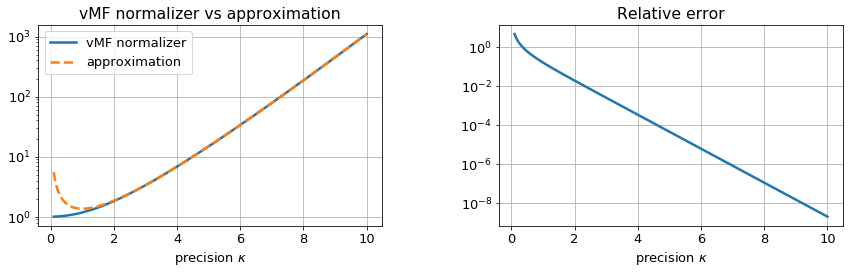

In [29]:
kappa = np.logspace(-1., 1., 200)
exact = np.exp(VMFLogNormalizer.exact(kappa))
approx = np.exp(VMFLogNormalizer.approx(kappa))

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
style = dict(linewidth=2.5)

ax = axes[0]
ax.set_title('vMF normalizer vs approximation')
ax.set_xlabel('precision $\kappa$')
ax.plot(kappa, exact, '-', **style, label='vMF normalizer')
ax.plot(kappa, approx, '--', **style, label='approximation')
ax.grid()
ax.set_yscale('log')
ax.legend()

ax = axes[1]
ax.set_title('Relative error')
ax.set_xlabel('precision $\kappa$')
ax.plot(kappa, np.abs(exact - approx) / exact, **style)
ax.grid()
ax.set_yscale('log')
fig.tight_layout(w_pad=6.)
fig.savefig(figdir / 'vmf-normalizer-approximation.png')

# Posterior

In [103]:
interp1d(kappa, approx)(mean)

array(0.51378644)

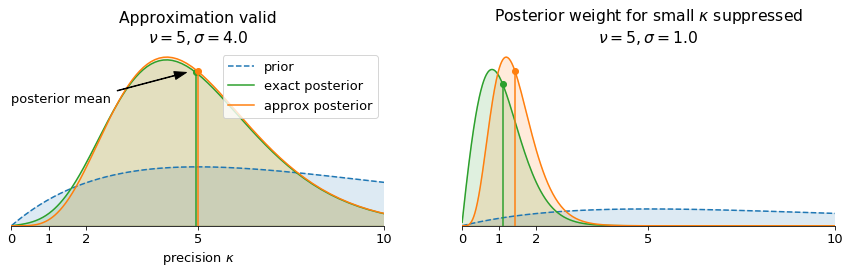

In [147]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

for iax, (ax, sval, title) in enumerate(zip(axes, [.8, .2], ['Approximation valid', 'Posterior weight for small $\kappa$ suppressed'])):

    alpha, mean = 2., 10.
    beta = alpha / mean
    nu = 5.
    sigma = sval * nu
    assert sigma <= nu

    kappa = np.logspace(-2., np.log10(50.), 300)
    log_prior = np.log(stats.gamma(alpha, scale=1. / beta).pdf(kappa))
    exact = log_prior + VMFLogNormalizer.exact(sigma * kappa) - nu * VMFLogNormalizer.exact(kappa)
    exact = np.exp(exact - exact.max())
    exact /= trapz(exact, kappa)
    approx = log_prior + VMFLogNormalizer.approx(sigma * kappa) - nu * VMFLogNormalizer.approx(kappa)
    approx = np.exp(approx - approx.max())
    approx /= trapz(approx, kappa)


    ax.set_title('\n'.join([title, r'$\nu=%d, \sigma=%.1f$' % (nu, sigma)]))
    for y, color, label in zip([np.exp(log_prior), exact, approx], ['C0', 'C2', 'C1'], ['prior', 'exact posterior', 'approx posterior']):
        is_prior = label == 'prior'
        ax.fill_between(kappa, y, color=color, alpha=.15)
        ax.plot(kappa, y, color, linestyle='--' if is_prior else '-', label=label)
        if not is_prior:
            mean = trapz(kappa * y, kappa)
            y_mean = interp1d(kappa, y)(mean)
            ax.plot([mean, mean], [-1., y_mean], 'o-', color=color)
    ax.set_xlim((0., 10.))
    ax.set_ylim((0., 1.05 * np.max(np.maximum(exact, approx))))
    ax.set_yticks([])
    ticks = np.array([0, 1, 2, 5, 10, ])
    ax.set_xticks(ticks)
    for k, spine in ax.spines.items():
        spine.set_visible(k == 'bottom')
    if iax == 0:
        ax.annotate('posterior mean', xy=(.96 * mean, y_mean), xytext=(0., .8 * y_mean),
            arrowprops=dict(facecolor='black', shrink=0.05, width=.5, headwidth=8),
        )
        ax.legend(loc='upper right')
        ax.set_xlabel('precision $\kappa$')
        
fig.tight_layout(w_pad=5.)
fig.savefig(figdir / 'vmf-posterior.png')